In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
AEMO_df = pd.read_csv('AEMOPriceDataSimple.csv')
SydTemp_df = pd.read_csv('SydTemp.csv')

In [3]:
SydTemp_df

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C)
0,IDCJAC0010,66062.0,1859.0,1.0,1.0,24.4,14.5
1,IDCJAC0010,66062.0,1859.0,1.0,2.0,24.4,15.7
2,IDCJAC0010,66062.0,1859.0,1.0,3.0,24.2,15.3
3,IDCJAC0010,66062.0,1859.0,1.0,4.0,24.7,17.4
4,IDCJAC0010,66062.0,1859.0,1.0,5.0,24.6,16.9
...,...,...,...,...,...,...,...
56884,IDCJAC0010,66062.0,2014.0,9.0,29.0,32.9,16.5
56885,IDCJAC0010,66062.0,2014.0,9.0,30.0,33.5,16.6
56886,IDCJAC0010,66062.0,2014.0,10.0,1.0,22.1,15.6
56887,IDCJAC0010,66062.0,2014.0,10.0,2.0,24.9,10.4


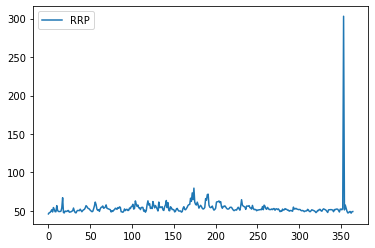

In [4]:
import matplotlib.pyplot as plt
AEMO_df.plot()
plt.show() #the outlier occurs when index = 353

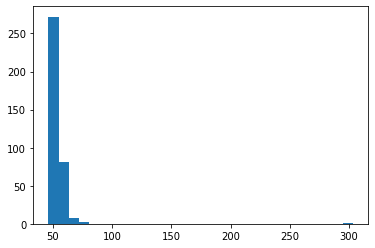

In [5]:
RRP = AEMO_df.loc[:,'RRP'].values
plt.hist(RRP, bins = 30)
plt.show()


In [6]:
factor_columns = ['Year','Month','Day','Maximum temperature (Degree C)','Minimum temperature (Degree C)']
relevant_factor = SydTemp_df.loc[:,factor_columns]
relevant_factor = relevant_factor.loc[relevant_factor.loc[:,'Year'] ==2013,:] 
relevant_factor = relevant_factor.iloc[:,[1,2,3,4]]

No processing

In [7]:
y1 = AEMO_df.loc[:,'RRP'].dropna().values
X1 = relevant_factor.dropna().values #X1.shape = (365,5)
Xnew1 = sm.add_constant(X1)

In [8]:
model1 = sm.OLS(y1, Xnew1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.406
Date:                Wed, 21 Oct 2020   Prob (F-statistic):              0.231
Time:                        09:08:39   Log-Likelihood:                -1471.4
No. Observations:                 365   AIC:                             2953.
Df Residuals:                     360   BIC:                             2972.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.7264      4.508     11.031      0.000      40.862      58.591
x1             0.1375      0.217      0.635      0.526      -0.288       0.563
x2             0.1029      0.082      1.259      0.209      -0.058       0.264
x3             0.3400      0.237      1.433      0.153      -0.127       0.807
x4            -0.4259      0.253     -1.686      0.093      -0.923       0.071
==============================================================================
Omnibus:                      805.797   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1315695.064
Skew:                          16.339   Prob(JB):                         0.00
Kurtosis:                     295.307   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

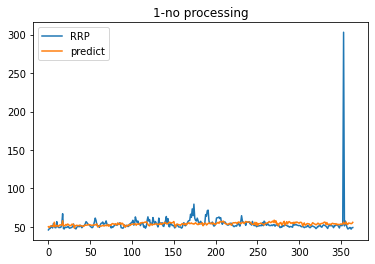

In [11]:
y1_hat = model1.predict(Xnew1)
AEMO_1 = AEMO_df.copy()
AEMO_1['predict'] = y1_hat
AEMO_1.plot()
plt.title('1-no processing')
plt.show()

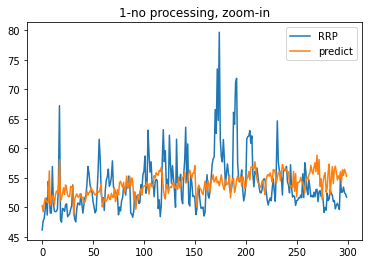

In [12]:
AEMO_1.iloc[:300,:].plot()#zoom in
plt.title('1-no processing, zoom-in')
plt.show()

with day to day-of-week

In [74]:
relevant_factor_day = relevant_factor_droped.copy()
relevant_factor_day.loc[:,'Day'] += 1 #01/01/2013 is a Tuesday
relevant_factor_day.loc[:,'Day'] %= 7
for i in range(len(relevant_factor_day)):
    if relevant_factor_day.loc[:,'Day'].iloc[i]==0:
        relevant_factor_day.loc[:,'Day'].iloc[i] += 7
#now day represent day of the weak

In [77]:
relevant_factor_day.iloc[:10,:]

,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C)
56248,1.0,2.0,26.2,20.2
56249,1.0,3.0,22.9,20.3
56250,1.0,4.0,24.8,18.4
56251,1.0,5.0,26.6,18.3
56252,1.0,6.0,28.3,20.9
56253,1.0,7.0,28.0,21.6
56254,1.0,1.0,27.5,21.4
56255,1.0,2.0,42.3,20.9
56256,1.0,3.0,25.0,21.1
56257,1.0,4.0,25.4,20.2


In [81]:
y2 = AEMO_df_no_outlier.loc[:,'RRP'].dropna().values
X2 = relevant_factor_day.dropna().values #X2.shape = (365,5)
Xnew2 = sm.add_constant(X2)

In [82]:
model2 = sm.OLS(y2, Xnew2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     21.34
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           8.33e-16
Time:                        09:30:33   Log-Likelihood:                -1004.6
No. Observations:                 364   AIC:                             2019.
Df Residuals:                     359   BIC:                             2039.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4068      1.301     47.983      0.000      59.849      64.965
x1            -0.2234      0.061     -3.664      0.000      -0.343      -0.103
x2            -0.0724      0.104     -0.699      0.485      -0.276       0.131
x3            -0.0545      0.067     -0.815      0.416      -0.186       0.077
x4            -0.4103      0.071     -5.786      0.000      -0.550      -0.271
==============================================================================
Omnibus:                      159.627   Durbin-Watson:                   0.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              793.452
Skew:                           1.834   Prob(JB):                    5.06e-173
Kurtosis:                       9.234   Cond. No.                         191.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

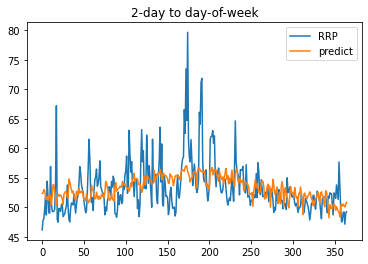

In [84]:
y2_hat = model2.predict(Xnew2)
AEMO_2 = AEMO_df_no_outlier.copy()
AEMO_2['predict'] = y2_hat
AEMO_2.plot()
plt.title('2-day to day-of-week')
plt.show()

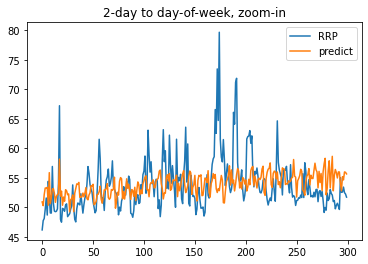

In [18]:
AEMO_2.iloc[:300,:].plot()#zoom in
plt.title('2-day to day-of-week, zoom-in')
plt.show()

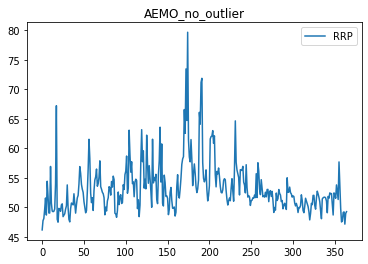

In [19]:
#drop the outlier
AEMO_df_no_outlier = AEMO_df.copy()
AEMO_df_no_outlier = AEMO_df_no_outlier.drop(index = 353)
AEMO_df_no_outlier.plot()
plt.title('AEMO_no_outlier')
plt.show()

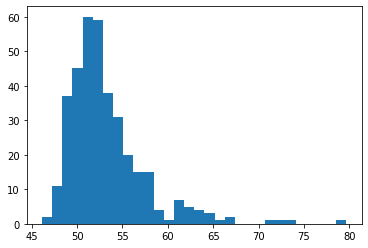

In [20]:
RRP_no_outliers = AEMO_df_no_outlier.loc[:,'RRP'].values
plt.hist(RRP_no_outliers, bins = 30)
plt.show()


In [64]:
relevant_factor_droped = relevant_factor.copy()
relevant_factor_droped = relevant_factor.drop(index = 56601) #drop the outlier       

(364, 4)

In [65]:
y3 = AEMO_df_no_outlier.loc[:,'RRP'].dropna().values
X3 = relevant_factor_droped.dropna().values #X3.shape = (364,5)
Xnew3 = sm.add_constant(X3)

In [66]:
model3 = sm.OLS(y3, Xnew3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.212
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     24.11
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           1.10e-17
Time:                        09:25:10   Log-Likelihood:                -1000.1
No. Observations:                 364   AIC:                             2010.
Df Residuals:                     359   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         61.0944      1.261     48.464      0.000      58.615      63.574
x1            -0.2257      0.060     -3.748      0.000      -0.344      -0.107
x2             0.0696      0.023      3.075      0.002       0.025       0.114
x3            -0.0543      0.066     -0.823      0.411      -0.184       0.075
x4            -0.4138      0.070     -5.913      0.000      -0.551      -0.276
==============================================================================
Omnibus:                      156.619   Durbin-Watson:                   0.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.050
Skew:                           1.800   Prob(JB):                    7.44e-167
Kurtosis:                       9.122   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

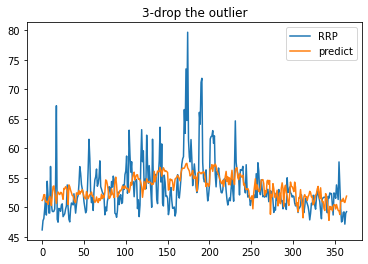

In [67]:
y3_hat = model3.predict(Xnew3)
AEMO_3 = AEMO_df_no_outlier.copy()
AEMO_3['predict'] = y3_hat
AEMO_3.plot()
plt.title('3-drop the outlier')
plt.show()

4.Month processing

In [70]:
relevant_factor_month_sqr = relevant_factor_droped.copy()
relevant_factor_month_sqr['Month_sqr'] = relevant_factor_month_sqr.loc[:,'Month']**2
#now day represent day of the weak

In [86]:
relevant_factor_month_sqr

,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C),Month_sqr
56248,1.0,1.0,26.2,20.2,1.0
56249,1.0,2.0,22.9,20.3,1.0
56250,1.0,3.0,24.8,18.4,1.0
56251,1.0,4.0,26.6,18.3,1.0
56252,1.0,5.0,28.3,20.9,1.0
...,...,...,...,...,...
56608,12.0,27.0,24.8,17.9,144.0
56609,12.0,28.0,25.5,19.4,144.0
56610,12.0,29.0,24.6,20.0,144.0
56611,12.0,30.0,24.2,18.8,144.0


In [71]:
y4 = AEMO_df_no_outlier.loc[:,'RRP'].dropna().values
X4 = relevant_factor_month_sqr.dropna().values #X4.shape = (364,5)
Xnew4 = sm.add_constant(X4)

In [72]:
model4 = sm.OLS(y4, Xnew4).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     23.47
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           2.10e-20
Time:                        09:25:47   Log-Likelihood:                -991.80
No. Observations:                 364   AIC:                             1996.
Df Residuals:                     358   BIC:                             2019.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.1480      2.304     23.069      0.000      48.617      57.679
x1             1.4647      0.418      3.503      0.001       0.643       2.287
x2             0.0649      0.022      2.926      0.004       0.021       0.109
x3            -0.0629      0.065     -0.974      0.331      -0.190       0.064
x4            -0.1514      0.094     -1.612      0.108      -0.336       0.033
x5            -0.1239      0.030     -4.084      0.000      -0.184      -0.064
==============================================================================
Omnibus:                      177.375   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1056.641
Skew:                           2.003   Prob(JB):                    3.58e-230
Kurtosis:                      10.322   Cond. No.                         908.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

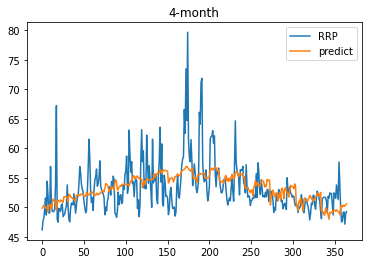

In [73]:
y4_hat = model4.predict(Xnew4)
AEMO_4 = AEMO_df_no_outlier.copy()
AEMO_4['predict'] = y4_hat
AEMO_4.plot()
plt.title('4-month')
plt.show()

In [29]:
relevant_factor_day_sqr = relevant_factor_droped.copy()
relevant_factor_day_sqr['Day_sqr'] = relevant_factor_day_sqr.loc[:,'Day']**2
# for i in range(len(relevant_factor_month)):
#     x = relevant_factor_day_sqr.loc[:,'Month'].iloc[i]
#     relevant_factor_day_sqr.iloc[i] = x**2
#now day represent day of the weak

In [30]:
relevant_factor_day_sqr

,Month,Day,Maximum temperature (Degree C),Minimum temperature (Degree C),Day_sqr
56248,1.0,2.0,26.2,20.2,4.0
56249,1.0,3.0,22.9,20.3,9.0
56250,1.0,4.0,24.8,18.4,16.0
56251,1.0,5.0,26.6,18.3,25.0
56252,1.0,6.0,28.3,20.9,36.0
...,...,...,...,...,...
56608,12.0,7.0,24.8,17.9,49.0
56609,12.0,1.0,25.5,19.4,1.0
56610,12.0,2.0,24.6,20.0,4.0
56611,12.0,3.0,24.2,18.8,9.0


In [31]:
y5 = AEMO_df_no_outlier.loc[:,'RRP'].dropna().values
X5 = relevant_factor_day_sqr.dropna().values #X4.shape = (364,5)
Xnew5 = sm.add_constant(X5)
model5 = sm.OLS(y5, Xnew5).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     17.08
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           3.70e-15
Time:                        09:10:41   Log-Likelihood:                -1004.4
No. Observations:                 364   AIC:                             2021.
Df Residuals:                     358   BIC:                             2044.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.0689      1.474     42.098      0.000      59.169      64.968
x1            -0.2240      0.061     -3.668      0.000      -0.344      -0.104
x2             0.1600      0.487      0.329      0.743      -0.798       1.118
x3            -0.0546      0.067     -0.816      0.415      -0.186       0.077
x4            -0.4110      0.071     -5.789      0.000      -0.551      -0.271
x5            -0.0290      0.059     -0.488      0.626      -0.146       0.088
==============================================================================
Omnibus:                      157.731   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              770.013
Skew:                           1.816   Prob(JB):                    6.22e-168
Kurtosis:                       9.130   Cond. No.                         269.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

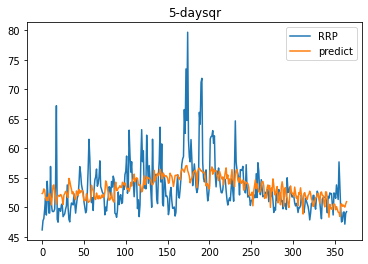

In [33]:
y5_hat = model5.predict(Xnew5)
AEMO_5 = AEMO_df_no_outlier.copy()
AEMO_5['predict'] = y5_hat
AEMO_5.plot()
plt.title('5-daysqr')
plt.show()

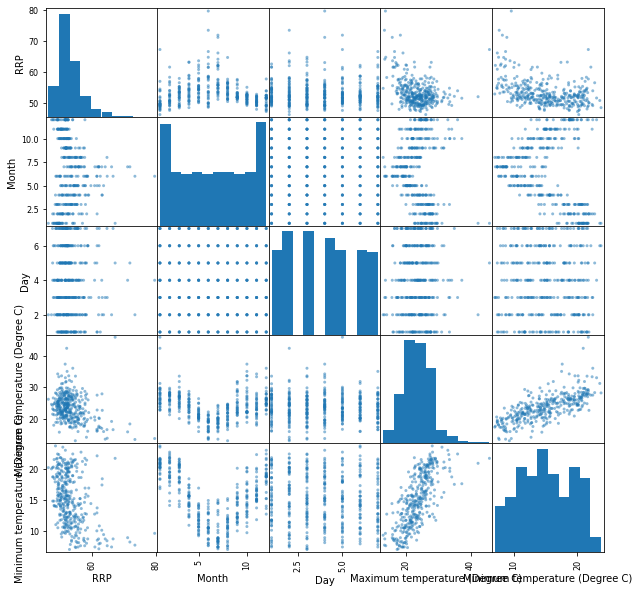

In [54]:
import numpy as np
columns_all = ['RRP']+factor_columns[1:]
RRP_no_outliers_2d = RRP_no_outliers[:,np.newaxis]
values_all = np.concatenate((RRP_no_outliers_2d,relevant_factor_droped),axis=1)
df_all = pd.DataFrame(values_all,columns = columns_all)
pd.plotting.scatter_matrix(df_all,figsize=(10,10));

In [88]:
relevant_factor_simplified = relevant_factor_month_sqr.drop(columns = 'Maximum temperature (Degree C)')
y6 = AEMO_df_no_outlier.loc[:,'RRP'].dropna().values
X6 = relevant_factor_simplified.dropna().values #X4.shape = (364,5)
Xnew6 = sm.add_constant(X6)
model6 = sm.OLS(y6, Xnew6).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     29.10
Date:                Wed, 21 Oct 2020   Prob (F-statistic):           5.75e-21
Time:                        09:36:54   Log-Likelihood:                -992.28
No. Observations:                 364   AIC:                             1995.
Df Residuals:                     359   BIC:                             2014.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         52.4710      2.196     23.890      0.000      48.152      56.790
x1             1.4453      0.418      3.461      0.001       0.624       2.266
x2             0.0651      0.022      2.935      0.004       0.021       0.109
x3            -0.2009      0.079     -2.545      0.011      -0.356      -0.046
x4            -0.1230      0.030     -4.055      0.000      -0.183      -0.063
==============================================================================
Omnibus:                      178.145   Durbin-Watson:                   0.887
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1069.994
Skew:                           2.011   Prob(JB):                    4.51e-233
Kurtosis:                      10.374   Cond. No.                         840.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

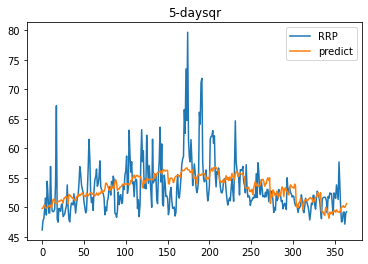

In [89]:
y6_hat = model6.predict(Xnew6)
AEMO_6 = AEMO_df_no_outlier.copy()
AEMO_6['predict'] = y6_hat
AEMO_6.plot()
plt.title('5-daysqr')
plt.show()

In [90]:
from statsmodels.stats.anova import anova_lm
anova_lm(model4,model6)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,358.0,4957.734562,0.0,NaN,NaN,NaN
1,359.0,4970.865481,-1.0,-13.130919,0.948326,NaN
